In [261]:
# Isaac Menninga, 2015
# script to load data for one country
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm, scipy

%matplotlib inline

In [262]:
# load conflict data
def load_conflict_data(country_name):
    '''This function is used to grab data on conflict occurances in a specific country. 
    The function takes one input, which is the name of the country you want to grab data for. Returns the data as a pandas data frame.'''
    
    #path is a string containing the path for the data files
    path = "../data/ACLED/" + country_name + '.xlsx'

    #read from excel file
    data = pd.read_excel(path)

    #only return necessary columns
    data = data[['YEAR', 'EVENT_TYPE', 'ACTOR1', 'LOCATION', 'FATALITIES']]
    data.columns = ['Year', 'Event_type', 'Actor', 'Location', 'Fatalities']
    data['Count'] = 1
    return(data)

#load climate data
def load_climate_data(country_name):
    '''This function is used to grab data on climate for each country.
    The function takes one input, which is the name of the country to grab data on. The function returns the data as a pandas data frame.'''
    
    #extreme filename is a dictionary containing the file extension corresponding to each variable for extreme weather patterns
    extremes_filename = {'f_extreme_heat' : 'TX90p.csiro_mk3_0.abs.txt', 'f_extreme_cold' : 'TX10p.csiro_mk3_0.abs.txt', 'f_heavy_rain' : 'R95pct.csiro_mk3_0.anom.txt'}

    #mean filename is a dictionary containing the file extension corresponding to each variable for mean temperature and precipitation
    mean_filename = {'temperature' : 'temp.csiro_mk3_5.anom.txt', 'precipitation' : 'precip.csiro_mk3_5.anom.txt'}

    #contains the file path for each group of variables
    #Extremes/... contains data on extreme weather, Mean/... contains mean temperature and precipitation data
    directories = ['/Model/Extremes/Timeseries/', '/Model/Mean/Timeseries/Anomalies/']
    
    #initializes data frame
    data = pd.DataFrame()
    
    # for each group of variables
    for directory in directories:
        # if the data is for extremes, iterate over extremes_variables and gets the final path for each file to grab
        if directory == '/Model/Extremes/Timeseries/':
            
            #gets the variable name from a list of variables
            #each variable corresponds to the end of the name of the file
            for file in extremes_filename:
                #variable for column names
                colnames = ['Year', 'Annual_' + file, 'JFM_' + file, 'AMJ_' + file, 'JAS_' + file, 'OND_' + file]
                
                #path is equal to the file path for the data file containing data on the current variable
                #concatonates country name, directory names and file names to form the specific file path
                path = '../data/climate/' + country_name + directory + country_name + '.ts.' + extremes_filename[file]
                
                #if the data frame is empty, set data equal to the contents of the first file
                if data.empty:
                    data = pd.read_table(path, delimiter = '\s+', header = None, names = colnames, skiprows = 15, nrows = 120, error_bad_lines = True, index_col='Year')
                    
                #if the data frame is not empty, concatonate the data from the second file to the first
                else:
                    data_2 = pd.read_table(path, delimiter = '\s+', header = None, names = colnames, skiprows = 15, nrows = 120, error_bad_lines = True, index_col='Year')
                    #data_2 = data_2.reset_index()
                    #data = data.reset_index(drop = True)
                    data = data.join(data_2)   

        # if the data is for means, iterate over mean_variables and get the final path for each data file
        elif directory == '/Model/Mean/Timeseries/Anomalies/':
            
            #gets the variable name from a list of variables
            #each variable corresponds to the end of the name of the file
            for file in mean_filename:
                #for column names
                colnames = ['Year', 'Annual_' + file, 'JFM_' + file, 'AMJ_' + file, 'JAS_' + file, 'OND_' + file]
                
                #path is equal to the file path for the data file containing data on the current variable
                #concatonates country name, directory names and file names to form the specific file path
                path = '../data/climate/' + country_name + directory + country_name + '.ts.' + mean_filename[file]
                
                #if the data frame is empty, set data equal to the contents of the first file
                if data.empty:
                    data = pd.read_table(path, delimiter = '\s+', header = None, names = colnames, skiprows = 15, nrows = 120, error_bad_lines = True, index_col='Year')
                    
                #if the data frame is not empty, concatonate the data from the second file to the first
                else:
                    data_2 = pd.read_table(path, delimiter = '\s+', header = None, names = colnames, skiprows = 15, nrows = 120, error_bad_lines = True, index_col='Year')
                    #data_2 = data_2.reset_index()
                    #data = data.reset_index(drop = True)
                    data = data.join(data_2)
    
    #renames columns to clarify which variable corresponds to which set of months
    #note: DJF = Dec., Jan., Feb., MAM = Mar., Apr., May., ... etc.
    print(data.columns)
    
    #reduces the size of the data
    data = data[['Annual_f_extreme_cold', 'Annual_f_extreme_heat', 'Annual_f_heavy_rain', 'Annual_precipitation', 'Annual_temperature']]
    
    #drop nan rows
    data = data.dropna()
    
    #drop the last row (inelegant solution to a problem!)
    data = data.drop(data.tail(1).index)
    
    #return final formatted data frame
    return data

In [263]:
# Load data on Chad to test plotting and statistics
climate_data = load_climate_data('Chad')
#print(climate_data.head(6))
conflict_data = load_conflict_data('Chad')
#print(conflict_data.head(6))

Index(['Annual_f_extreme_cold', 'JFM_f_extreme_cold', 'AMJ_f_extreme_cold',
       'JAS_f_extreme_cold', 'OND_f_extreme_cold', 'Annual_f_extreme_heat',
       'JFM_f_extreme_heat', 'AMJ_f_extreme_heat', 'JAS_f_extreme_heat',
       'OND_f_extreme_heat', 'Annual_f_heavy_rain', 'JFM_f_heavy_rain',
       'AMJ_f_heavy_rain', 'JAS_f_heavy_rain', 'OND_f_heavy_rain',
       'Annual_precipitation', 'JFM_precipitation', 'AMJ_precipitation',
       'JAS_precipitation', 'OND_precipitation', 'Annual_temperature',
       'JFM_temperature', 'AMJ_temperature', 'JAS_temperature',
       'OND_temperature'],
      dtype='object')


In [264]:
#create smaller data set to work with
climate_small_data = climate_data[['Annual_precipitation', 'Annual_f_heavy_rain', 'Annual_f_extreme_cold', 'Annual_f_extreme_heat']]
conflict_small_data = conflict_data[['Fatalities', 'Year', 'Count']]

#rename columns
climate_small_data.columns = ['precip', 'f_rain', 'f_cold', 'f_heat']

#group conflict data by year
conflict_small_data = conflict_small_data.groupby('Year').sum()

#make indices the same type for merging
#reset index to make 'Year' a column not an index
conflict_small_data = conflict_small_data.reset_index().astype(float)
climate_small_data = climate_small_data.reset_index().astype(float)

#merge the data
data = climate_small_data.merge(conflict_small_data, how = 'outer')

In [265]:
#initialize data frame
data_pred = pd.DataFrame()

#iterate for each column
for column in climate_small_data.columns:
    #linear regression for each column variable
    lm = sm.formula.ols(formula = column + " ~ Year", data = climate_small_data).fit()

    #range of missing date values
    xnew = pd.DataFrame({'Year' : range(2000, 2046)})

    #predict missing values for column variable
    y_pred = lm.predict(xnew)

    #create data frame from predicted values
    y_pred_df = pd.DataFrame({'Year' : range(2000, 2046), column : y_pred})
    
    #merge data into initialized data frame
    if data_pred.empty:
        data_pred = y_pred_df[:]
    else:
        data_pred = data_pred.merge(y_pred_df)

data_pred

,Year,f_rain,f_cold,f_heat
0,2000,0.464518,9.290094,13.245417
1,2001,0.479225,9.234666,13.445079
2,2002,0.493933,9.179238,13.644741
3,2003,0.508640,9.123810,13.844403
4,2004,0.523348,9.068381,14.044065
5,2005,0.538055,9.012953,14.243726
6,2006,0.552763,8.957525,14.443388
7,2007,0.567470,8.902097,14.643050
8,2008,0.582178,8.846669,14.842712
9,2009,0.596886,8.791241,15.042374


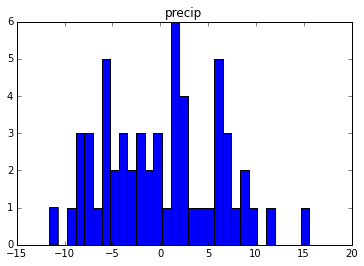

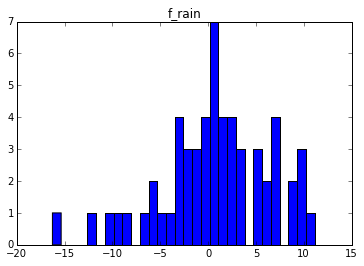

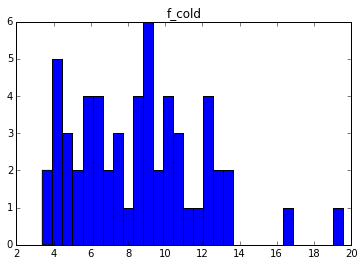

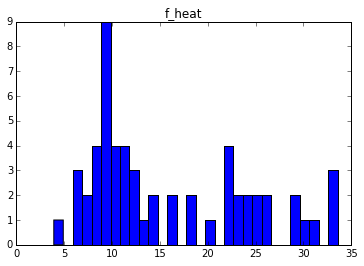

In [266]:
#loop to get histograms of each variable
for column in climate_small_data.columns:
    #histogram of the distribution of years is not useful!
    if column != 'Year':
        plt.hist(climate_small_data[column], bins = 30)
        #title for each to differentiate each plot
        plt.title(column)
        plt.show()

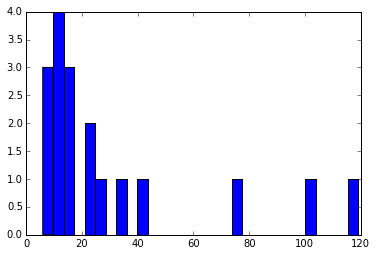

In [267]:
#histogram of conflict variable
#distribution of number of conflicts per year
plt.hist(conflict_small_data.Count, bins = 30)

plt.show()

In [268]:
#once data problem is fixed:

#correlation analysis of climate variables vs. frequency of conflict
#Climate data looks normally distributed, but the frequency of conflict is not

#visualize data